<a href="https://colab.research.google.com/github/sozkaynak/Machine-Learning-with-Python/blob/master/KnnDiabetesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skfeature.function.information_theoretical_based.MRMR import mrmr
from sklearn.metrics import precision_score, accuracy_score,mean_squared_error,f1_score
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
diabetes = pd.read_csv('diabetes.csv') #8 input and 2 class(0 or 1)
X=pd.DataFrame(diabetes.iloc[:,:-1]).values  #input
y=diabetes.iloc[:,-1:]#output

In [15]:
#k-Nearest Neighbors
k=X.shape[1]
print(k)
kSet=list(range(1,k+1))
print(kSet)
rmseSet=[]
f1_macroSet=[]
f1_microSet=[]
f1_weightSet=[]
training_accuracy = []
test_accuracy = []
for i in range(1,k+1): 
  kwargs_u={"n_selected_features":i}
  X1= mrmr(X,y, **kwargs_u)
  X2=X1[0][:][:]
  x=X[:,X2]
  
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=66)
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import precision_score, accuracy_score,mean_squared_error,f1_score
  
  
  neighbors_settings = range(1, k+1)
  for n_neighbors in neighbors_settings:
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    predsKnn=knn.predict(x_test)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
  knn = KNeighborsClassifier(n_neighbors=9)
  knn.fit(X_train, y_train)
 
  
  #for f1 scorrer
  f1_macro=f1_score(y_test, predsKnn, average='macro')
  """print("kwargs_u:",kwargs_u,"için f1_macro:",f1_macro)"""
  f1_macroSet.append(f1_macro)

  f1_micro=f1_score(y_test, predsKnn, average='micro')
  """print("kwargs_u:",kwargs_u,"için f1_micro:",f1_micro)"""
  f1_microSet.append(f1_micro)

  f1_weight=f1_score(y_test, predsKnn, average='weighted')  
  """print("kwargs_u:",kwargs_u,"için f1_weight:",f1_weight)"""
  f1_weightSet.append(f1_weight)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


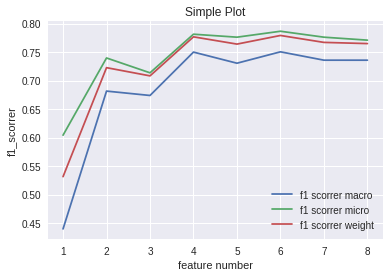

In [17]:
plt.plot(kSet, f1_macroSet, label='f1 scorrer macro')
plt.plot(kSet, f1_microSet, label='f1 scorrer micro')
plt.plot(kSet, f1_weightSet, label='f1 scorrer weight')

plt.xlabel('feature number')
plt.ylabel('f1_scorrer')

plt.title("Simple Plot")

plt.legend()

plt.show()